In [28]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### First Example Scalar function or Scalar Equation (3x^2-4x+5)

In [84]:
#Random Scaler Valued Function
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
# Example testing the value
f(3.0)

20.0

In [ ]:
# Trying to plot a graph of the equation
# first geting numbers from a range
# X Axis
xs = np.arange(-5, 5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [ ]:
# Y Axis after runnig the xs Values through the function
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

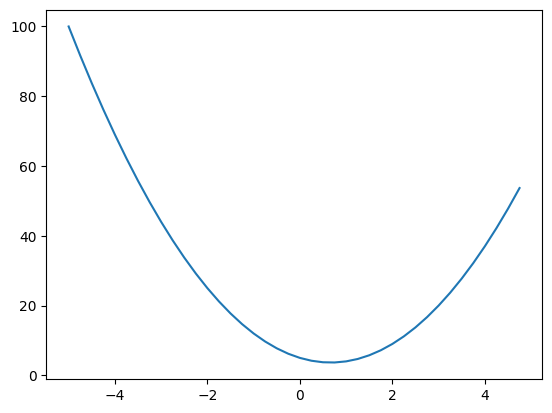

In [ ]:
# Plotting the Graph
plt.plot(xs, ys)

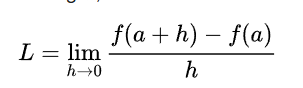

In [ ]:
# We can now measure how much a line will change if we tweak it a bit by the derivative or Limit formula
# Show the image of the limit-formula.jpg from static folder
from PIL import Image
from IPython.display import display

img = Image.open("sample_data/limit-formula.png")
display(img)


In [ ]:
# Lets see the derivative of the function f(x) = 3x^2 - 4x + 5 with a variation
h = 0.00000000000001
x = 3.0
(f(x + h) - f(x))/h


14.210854715202004

In [ ]:
h = 0.00000000000001
x = -3.0
(f(x + h) - f(x))/h

-22.026824808563106

In [ ]:
h = 0.00000000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

In [ ]:
# Lets go more complex
a = 2.0
b= -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# Inputs
a= 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


## Main Model

In [ ]:
class Value:
    # Telling that a input data is must to initiate the class
    # _children is to store before steps or values and its a tuple
    # Eg of _children [ for equation a*b+c Step1 is a*b stores in d and Step 2 is d + c then e here _prev(e) is d and c. _prev(d) is a and b ]
    # _op is to store the operation symbol so that it can be easy to understand in future in the visualization
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        # _prev is to store childen as a set so that order doesn't matter
        self._prev = set(_children)
        self._op = _op
        self.label = label


    # Gives a more readable data instead of very small values or Giving only the data we enter
    def __repr__(self):
        return f"Value(data={self.data})"

    # Can be able to add two number
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    # Can be able to multiply two numbers
    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e+c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L


Value(data=-8.0)

In [ ]:
# Seeing the _prev
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
d._op

'+'

In [29]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

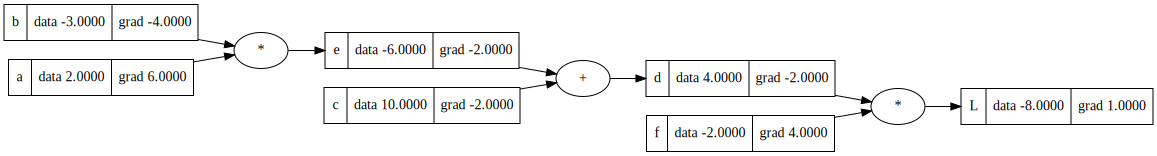

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1.0

### finding out Derivative of d according to L
i.e dL/dd

We know - L = d*f

Formula
(f(x+h)-f(x))/h

((d+h)*f - d*f)/h ## Assuming f is constant

(d*f + h*f - d*f)/h = f

In [ ]:
d.grad = -2.0 * L.grad
f.grad = 4.0 * L.grad

## Finding dL/dc
- we know what is the sensivity of d to L i.e is derivative of L according to d
- dd/dc = ??
- We know d = c+e
- We know formula (f(x+h) - f(x)) / h
- Applying the formula -> ((c+h+e) - (c+e))/h
- (c+h+e-c-e)/h = 1
- Now we have the local derivative of dd/dc so now the influence of c on L is
- dL/dc = (dd/dc) * (dL/dc)

`Note` :
- `If the children add adding then the grad of the result just copy to the two child nodes as the local derivative of a + node is always 1`
- `If the children are multiplying then the grad is multiplying the grad of another child with the grad of parent`


In [ ]:
e.grad = -2.0
c.grad = -2.0

In [ ]:
## from knowing how the * (multiplicatiob) node works with derivation
a.grad = b.data * e.grad
b.grad = a.data * e.grad

In [ ]:
# just testing and finding out grad without messing up global data
def lol():
  h = 0.001
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e+c ; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d*f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e+c ; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d*f; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

1.000000000000334


## Conclusion :
- We can now influence the total output  by nudging the leaf-nodes just by multiplying the 0.001 or any number with it's grad and add it to the value to know the influence of it to the output
- We repeat it by moving forward and then backpropagating again and again to achieve the correct neuron


---

# Model

#### Added Tanh function to the Model

In [ ]:
class Value:
    # Telling that a input data is must to initiate the class
    # _children is to store before steps or values and its a tuple
    # Eg of _children [ for equation a*b+c Step1 is a*b stores in d and Step 2 is d + c then e here _prev(e) is d and c. _prev(d) is a and b ]
    # _op is to store the operation symbol so that it can be easy to understand in future in the visualization
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        # _prev is to store childen as a set so that order doesn't matter
        self._prev = set(_children)
        self._op = _op
        self.label = label


    # Gives a more readable data instead of very small values or Giving only the data we enter
    def __repr__(self):
        return f"Value(data={self.data})"

    # Can be able to add two number
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    # Can be able to multiply two numbers
    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self,), 'tanh')
      return out




## A neuron works:
- Inputs of node
- Weights of each node i.e geberated randomly
- bias of the model which can be also random that can determine like innate happiness regardless of the input
- Activation function to squash the output

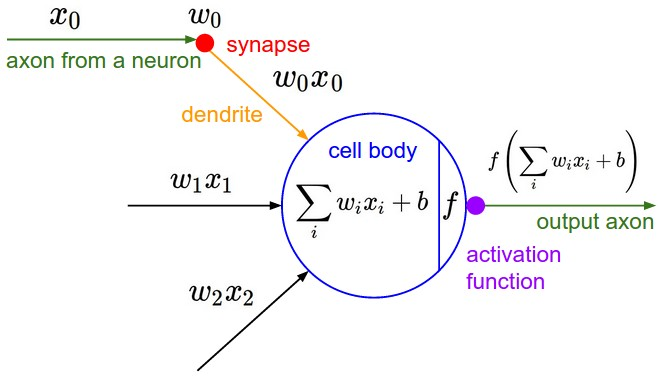

In [ ]:
# We can now measure how much a line will change if we tweak it a bit by the derivative or Limit formula
# Show the image of the limit-formula.jpg from static folder
from PIL import Image
from IPython.display import display

img = Image.open("/sample_data/neuron_model.jpeg")
display(img)


## There are multiple activation function like Tanh or Relu, etc,.
- Tanh can squash the output between 1 and -1
- Sigmoid squash the output between 0 and 1

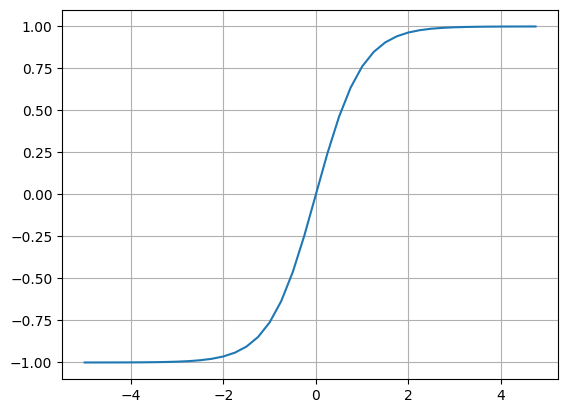

In [ ]:
plt.plot(np.arange(-5,5,0.25), np.tanh(np.arange(-5,5,0.25))) ; plt.grid();

## Here The Activation Function we are using is tanh:
- Tanh Formula = (1-e<sup>-2x</sup>)/(1+e<sup>-2x</sup>)
- Derivation of Tanh i.e., if o = tanh(n) then do/dx = 1 - tanh(n)<sup>2</sup>

In [ ]:
# A new equation with weights

# inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1 and w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


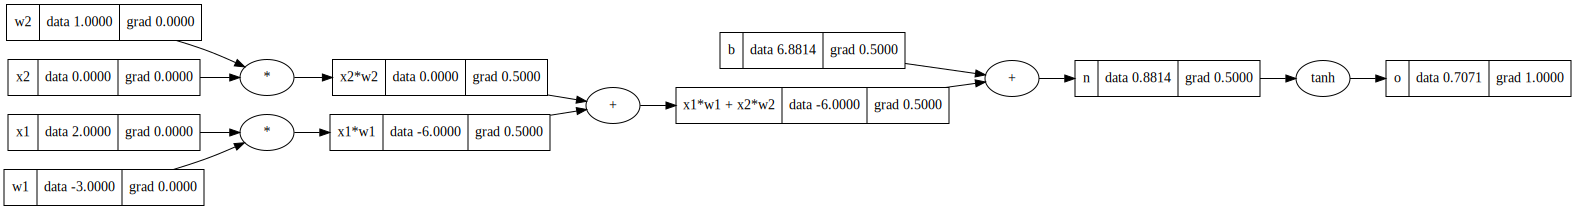

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1.0

In [ ]:
# Finding n.grad by derivative of o based on n do/dn
# According to formula
n.grad = (1-o.data**2)

In [ ]:
# children of n are b and x1*wi + x2*w2 as they are + node the grad just copies
b.grad = n.grad
x1w1x2w2.grad = n.grad

In [ ]:
# The chilren of x1w1x2w2 are also a + node so parent grad just copies in children
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

In [ ]:
# The children or x1w1 are x1 and w1 and they are * grad so we have to multiply the parent grad with opposite child to get the grad of a child
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
# The children or x2w2 are x2 and w2 and they are * grad so we have to multiply the parent grad with opposite child to get the grad of a child
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

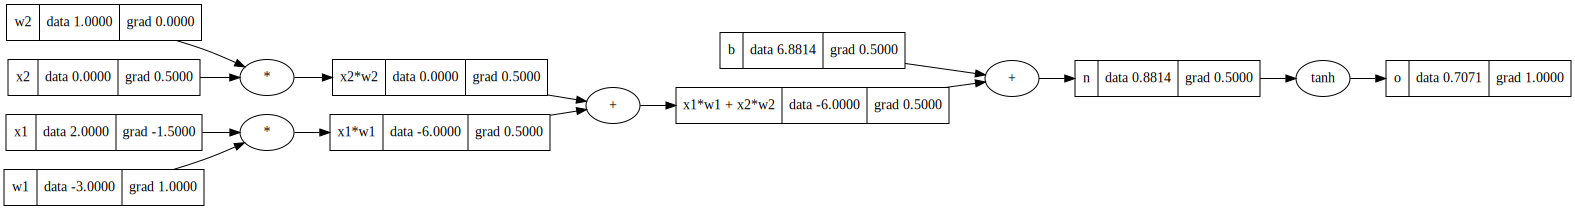

In [ ]:
draw_dot(o)

## Note :   
- In a neuron we only change the weights to tune the model accurately wiht a small value that we decide as learning rate the smaller the number the more steps needed to tune the model but larger the number the bigger steps it takes but it might completly miss the accurate weights so we prefer 0.01 as learning rate

#### Adding backpropagation to the model so that it can be done automatically

In [ ]:
class Value:
    # Telling that a input data is must to initiate the class
    # _children is to store before steps or values and its a tuple
    # Eg of _children [ for equation a*b+c Step1 is a*b stores in d and Step 2 is d + c then e here _prev(e) is d and c. _prev(d) is a and b ]
    # _op is to store the operation symbol so that it can be easy to understand in future in the visualization
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        # _prev is to store childen as a set so that order doesn't matter
        self._prev = set(_children)
        self._op = _op
        self.label = label



    # Gives a more readable data instead of very small values or Giving only the data we enter
    def __repr__(self):
        return f"Value(data={self.data})"

    # Can be able to add two number
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
          self.grad = 1.0*out.grad
          other.grad = 1.0*out.grad
        out._backward = _backward
        return out

    # Can be able to multiply two numbers
    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
          self.grad = other.data * out.grad
          other.grad = self.data*out.grad
        out._backward = _backward
        return out

    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self,), 'tanh')
      def _backward():
        self.grad = (1 - t**2) * out.grad
      out._backward = _backward
      return out




- Derivating the grad directly form the function with the same example as above

In [ ]:
# Same equation

# inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1 and w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


In [ ]:
# in the funtion grad is initially defined as 0 but when we multiply with the grad initially it will become 0 instead of 1 so we will initialize the o.grad with 1
o.grad = 1.0

In [ ]:
# This will add the grad of it's children
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

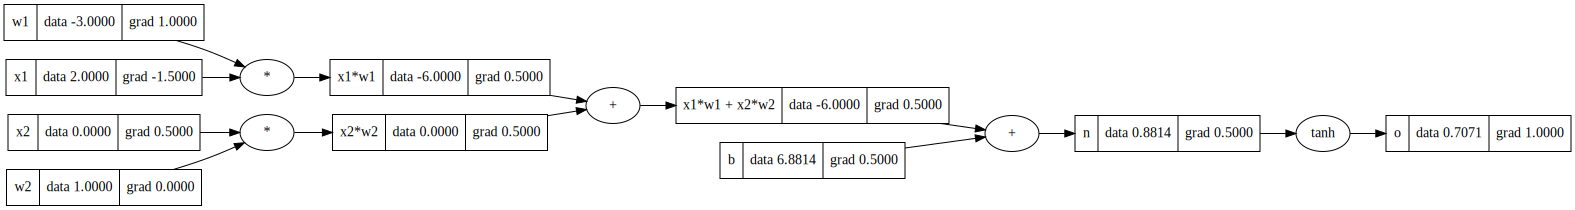

In [ ]:
draw_dot(o)

## Now instead of calling backward at each level we can just build it in a way that all grads apply in one call
 - To do that we have to know topological sort
 - It is a technique to create a list form left to right in a single line that covers all the nodes

In [ ]:
# topological order code
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

- The topo arranged all the nodes in a serial list, now we just need to reverse it and add _backward to it

In [ ]:
# topological order code
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

# initialize the first node with 1.0
o.grad = 1.0

for node in reversed(topo):
  node._backward()

In [ ]:

# Adding this code to our model
class Value:
    # Telling that a input data is must to initiate the class
    # _children is to store before steps or values and its a tuple
    # Eg of _children [ for equation a*b+c Step1 is a*b stores in d and Step 2 is d + c then e here _prev(e) is d and c. _prev(d) is a and b ]
    # _op is to store the operation symbol so that it can be easy to understand in future in the visualization
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        # _prev is to store childen as a set so that order doesn't matter
        self._prev = set(_children)
        self._op = _op
        self.label = label



    # Gives a more readable data instead of very small values or Giving only the data we enter
    def __repr__(self):
        return f"Value(data={self.data})"

    # Can be able to add two number
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
          self.grad = 1.0*out.grad
          other.grad = 1.0*out.grad
        out._backward = _backward
        return out

    # Can be able to multiply two numbers
    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
          self.grad = other.data * out.grad
          other.grad = self.data*out.grad
        out._backward = _backward
        return out

    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self,), 'tanh')
      def _backward():
        self.grad = (1 - t**2) * out.grad
      out._backward = _backward
      return out

    def backward(self):
      # topological order code
      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)
      topo

      # initialize the first node with 1.0
      self.grad = 1.0

      for node in reversed(topo):
        node._backward()




In [ ]:
# Same equation

# inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1 and w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


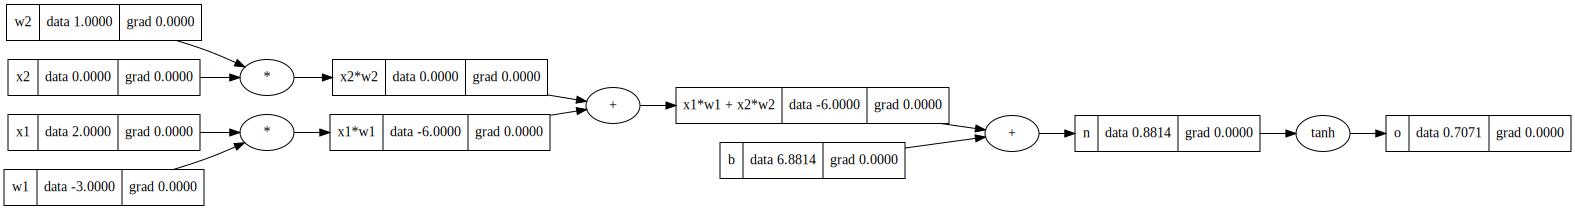

In [ ]:
draw_dot(o)


In [ ]:
o.backward()

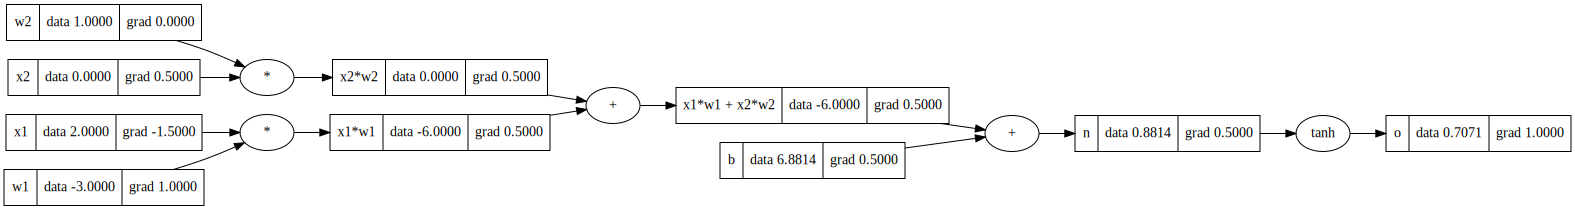

In [ ]:
draw_dot(o)

- This is backpropagation for one nueron but there is a bug in a specific conditions, let's fix those

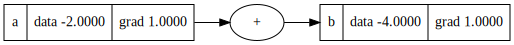

In [ ]:
# Let's take an equation
a = Value(-2.0, label= 'a')
b = a+a ; b.label = 'b'
b.backward()
draw_dot(b)

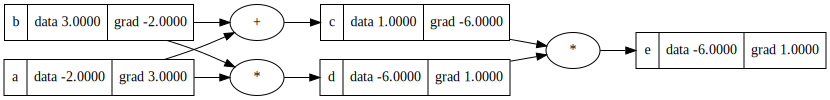

In [ ]:
a = Value(-2.0, label= 'a')
b = Value(3.0, label= 'b')
c = a+b ; c.label = 'c'
d = a*b ; d.label = 'd'
e = c*d ; e.label = 'e'
e.backward()
draw_dot(e)

## Here the a is added two times to become b but in our model when it's adding node we just multiply by 1.0 or in multiply we do the operation of parent.grad*othernode.data
- What essentially happening here is that the backpropagation is happening step by step and it just replacing the grad that last calculated so we don't have the correct grad


- `So to fix that we just have to add the grad of each node. this is a rule in the differentiaton to accumulate the results i.e., nothing but adding them `

In [134]:
# Fixed Model
class Value:
    # Telling that a input data is must to initiate the class
    # _children is to store before steps or values and its a tuple
    # Eg of _children [ for equation a*b+c Step1 is a*b stores in d and Step 2 is d + c then e here _prev(e) is d and c. _prev(d) is a and b ]
    # _op is to store the operation symbol so that it can be easy to understand in future in the visualization
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        # _prev is to store childen as a set so that order doesn't matter
        self._prev = set(_children)
        self._op = _op
        self.label = label



    # Gives a more readable data instead of very small values or Giving only the data we enter
    def __repr__(self):
        return f"Value(data={self.data})"

    # Can be able to add two number
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other) # this is for if a + 2 works but 2+a does not work as int adding to data so we are changing it to int to value object or data
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
          self.grad += 1.0*out.grad
          other.grad += 1.0*out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
      return self*other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __neg__(self): # -self
      return self * -1

    def __sub__(self, other): # self - other
      return self + (-other)

    def __radd__(self, other): # other + self
      return self + other

    # Can be able to multiply two numbers
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other) # this is for if a * 2 works but 2 * a does not work as int adding to data so we are changing it to int to value object or data
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
          self.grad += other.data * out.grad
          other.grad += self.data*out.grad
        out._backward = _backward
        return out

    def __pow__(self, other):
      assert isinstance(other, (int, float)), "only supporting int/float powers for now"
      out = Value(self.data**other, (self,), f'**{other}')

      def _backward():
          self.grad += other * (self.data ** (other - 1)) * out.grad
      out._backward = _backward

      return out

    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self,), 'tanh')
      def _backward():
        self.grad += (1 - t**2) * out.grad
      out._backward = _backward
      return out

    def exp(self):
      x = self.data
      out = Value(math.exp(x), (self, ), 'exp')

      def _backward():
        self.grad += out.data * out.grad
      out._backward = _backward

      return out

    def backward(self):
      # topological order code
      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)
      topo

      # initialize the first node with 1.0
      self.grad = 1.0

      for node in reversed(topo):
        node._backward()




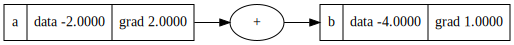

In [87]:
# Let's take an equation
a = Value(-2.0, label= 'a')
b = a+a ; b.label = 'b'
b.backward()
draw_dot(b)

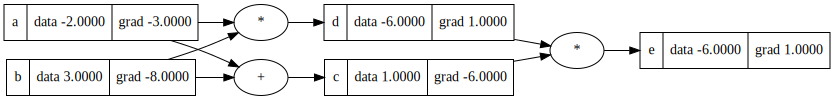

In [88]:
a = Value(-2.0, label= 'a')
b = Value(3.0, label= 'b')
c = a+b ; c.label = 'c'
d = a*b ; d.label = 'd'
e = c*d ; e.label = 'e'
e.backward()
draw_dot(e)

## Building the Neural Network

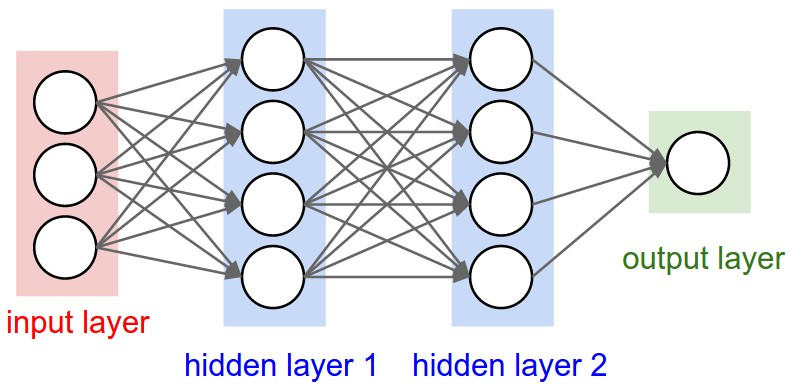

In [ ]:
# Let us build a neural network just like in the image
from PIL import Image
from IPython.display import display

img = Image.open("/sample_data/neural_net2.jpeg")
display(img)

In [135]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # we use zip to align the data elements to target value like for ech input align w and b for that value generated
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]


class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()] # Collect parameters from each layer


In [94]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)


Value(data=-0.9474340665047903)

In [95]:
n.parameters()

[Value(data=-0.605489875240615),
 Value(data=-0.7769420368789428),
 Value(data=-0.8640396213995274),
 Value(data=0.3362885986251276),
 Value(data=0.46619111387156154),
 Value(data=-0.9351069267091872),
 Value(data=0.9134272778786254),
 Value(data=-0.48909269973208214),
 Value(data=-0.34658858727427133),
 Value(data=-0.33543529326703725),
 Value(data=-0.30025956583331403),
 Value(data=-0.6255044221071167),
 Value(data=0.15985367645770276),
 Value(data=0.5711257227736939),
 Value(data=-0.3399827755245215),
 Value(data=-0.8270016185111053),
 Value(data=-0.36701233863620253),
 Value(data=0.4561790649720636),
 Value(data=0.7074518411536048),
 Value(data=-0.8081566948834393),
 Value(data=-0.39301960870252794),
 Value(data=-0.8681005775702724),
 Value(data=-0.62373236920008),
 Value(data=0.7751233680669818),
 Value(data=0.8081520262353621),
 Value(data=0.6561321559221358),
 Value(data=-0.25491248457666016),
 Value(data=0.7518579229123525),
 Value(data=0.592247782746115),
 Value(data=-0.046627

In [136]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.982814407825809),
 Value(data=-0.985271160757042),
 Value(data=-0.9831235209554307),
 Value(data=0.9884244667684716)]

In [137]:
# Error for each node
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]


[Value(data=0.0002953445783776157),
 Value(data=0.00021693870544489902),
 Value(data=0.0002848155449417883),
 Value(data=0.00013399296959421784)]

In [138]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=0.0009310917983585209)

In [139]:
# Backward chaining
loss.backward()

In [140]:
for p in n.parameters():
  p.data += -0.1 * p.grad

In [141]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=0.0009310917983585209)

In [142]:
ypred

[Value(data=0.982814407825809),
 Value(data=-0.985271160757042),
 Value(data=-0.9831235209554307),
 Value(data=0.9884244667684716)]

In [132]:
# We first have to forward pass to build the network, then backward pass with
# loss then we can update or change the leaf node weights to tune the model
# The 100 is the epoch or no.of time you want to train and finetune the model
for k in range(100):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    # we reset the grad values to '0' as in the Value model has '+=' but we want to replace the values so initialize it again with '0'
    p.grad = 0.0
  loss.backward()

  # update
  for p in n.parameters():
    # the -0.1 is the learning rate which means how much tweak you want to make to leaf node weights.
    p.data += -0.1 * p.grad

  print(k, loss.data)

0 0.0011430143094864741
1 0.0011404474061814513
2 0.0011378914039344376
3 0.0011353462344421096
4 0.001132811829967158
5 0.001130288123332502
6 0.0011277750479154807
7 0.0011252725376422084
8 0.0011227805269819053
9 0.0011202989509413919
10 0.0011178277450595903
11 0.0011153668454020969
12 0.0011129161885558394
13 0.0011104757116237951
14 0.0011080453522197735
15 0.0011056250484632328
16 0.001103214738974202
17 0.0011008143628682767
18 0.0010984238597515732
19 0.0010960431697158875
20 0.001093672233333745
21 0.0010913109916537516
22 0.0010889593861956985
23 0.001086617358945963
24 0.0010842848523528693
25 0.0010819618093220872
26 0.0010796481732121622
27 0.001077343887830005
28 0.0010750488974264692
29 0.0010727631466920548
30 0.0010704865807525253
31 0.0010682191451646843
32 0.0010659607859121699
33 0.00106371144940127
34 0.0010614710824568359
35 0.0010592396323182076
36 0.00105701704663518
37 0.001054803273464041
38 0.0010525982612636818
39 0.0010504019588916508
40 0.0010482143156003

In [133]:
ypred

[Value(data=0.982798619978953),
 Value(data=-0.9852568253241749),
 Value(data=-0.9831078120532297),
 Value(data=0.9884135798898975)]